In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import investpy
from ipywidgets import interact, interactive, fixed, interact_manual

source: <br>
[www.codingfinance.com][id] 

[id]:https://www.codingfinance.com/post/2018-04-05-portfolio-returns-py/ "Website access"


[Sharpe ratio](https://www.learnpythonwithrune.org/how-to-calculate-sharpe-ratio-with-pandas-and-numpy/)


* * *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import pandas_datareader.data as wb 
import datetime as dt
from datetime import datetime, timedelta

In [3]:
# Program to calculate cumulative moving average
# using numpy
  
import numpy as np
  
arr = [1, 2, 3, 7, 9]
  
i = 1
# Initialize an empty list to store cumulative moving
# averages
moving_averages = []
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
  
# Loop through the array elements
while i <= len(arr):
  
    # Calculate the cumulative average by dividing
    # cumulative sum by number of elements till 
    # that position
    window_average = round(cum_sum[i-1] / i, 2)
      
    # Store the cumulative average of
    # current window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1

print(cum_sum)
print(moving_averages)

[ 1  3  6 13 22]
[1.0, 1.5, 2.0, 3.25, 4.4]


# 1. Functions

## 1.1 Return function

In [39]:
def Return(df,x,t_return,w):
    """ 
    x: rolling period
    t_return: Linear or Log return
    w: weights of assets
    """
    if t_return=='linear':
        dg=df/df.shift(x)-1
        dg=dg[x:]
        dh=np.sum(w@dg,axis=1)
        print(dh)
        #dg.columns=[df.columns + '_linReturn']# Linear return
        
        #dg[df.columns + '_CumlinReturn']=np.cumsum(dg[df.columns + '_linReturn']) # Cumulative linear return
    #pd.options.display.float_format = '{:.2%} %'.format  #'{:.2f} %'.format()
    #    dg.columns=['%s_lreturn_%sD' % (i,x)]
    #dg=dg[x:]
    
    # Linear Returns data
    elif t_return=='log':
        # dg matrix of returns for each asset
        dg=np.log(df)-np.log(df.shift(x))
        dg=dg[x:]
        
        # dh Return of the portfolio by summing each weighted asset by its return
        dh=np.sum(dg * w,axis=1)
        #dg.columns=[df.columns + '_logReturn'] #Log return
        #dg[df.columns + '_CumullogReturn']=np.cumsum(dg[df.columns + '_logReturn']) # Cumulative log return
    
    return  dg, dh

In [49]:
print(len(df.columns))
print(len(Returns_Portfolio[1].columns))

4


AttributeError: 'Series' object has no attribute 'columns'

## 1.2  Variance

In [5]:
def VARIANCE(df):
    print('Variance :', sqr(f.var()))
    return df.var(),

## 1.3 VCV Matrix

In [6]:
# Matrix Anualised Variance
def VCV_Matrix(df):
    
    return df.cov()

## 1.4 Skweness and Curtosis

In [7]:
def Skew_Kurt(df):
    Skew=df.skew(axis=0, skipna = True)
    Kurt=df.kurt(axis=0, skipna = True)
    print('Skew :', Skew, '\n')
    print('Kurt :', Kurt)
    return Skew, Kurt
    

## 1.5 Sharpe Ratio

In [8]:
def sharpe(df):
    

SyntaxError: unexpected EOF while parsing (1885500755.py, line 2)

# START PORTFOLIO

In [ ]:
start = dt.datetime(2015,1,1) #(2013, 1,1) #1980, 1, 1)
end = dt.datetime(2022, 10, 7)

tickers =  ['AAPL', 'MSFT', 'TWTR', 'IBM'] # ['^FCHI'] ['BAC', 'GS', 'JPM', 'MS'] #['AAPL', 'NKE', 'GOOGL','AMZN']
price_data = web.DataReader(tickers,
                        'yahoo',start,end) ['Close'] #'yahoo', start, end) ['Close']#['Adj Close']
#w = {'BAC': 0.1, 'GS': 0.2, 'JPM': 0.5, 'MS': 0.2}
#w = pd.Series(w)
w = pd.DataFrame([0.10,0.25,0.45,0.20],columns=['Weights'])
print(w)
df=price_data.copy()
df

In [55]:
w = pd.DataFrame([0.10,0.25,0.45,0.20],columns=['Weights'])
# https://thepythonyouneed.com/how-to-compute-the-sharpe-ratio-using-python

## Returns Matrix

In [10]:
date_final = end + dt.timedelta(weeks=-4)
print(end)
print(dt.timedelta(weeks=4))

2022-10-07 00:00:00
28 days, 0:00:00


In [45]:
# Matrix Returns
# Using a log return has time additive properties (ln(S2/S3)=ln(1+R2/3)=R2/3 (small R2/3) 
Returns_Portfolio=Return(df,1,'log',w)
#Returns_Portfolio_m=Return(df,30,'log')

#print(Returns_Portfolio)
print(Return(Returns_Portfolio[1],1,'log',[1]))

# Mean Returns
#mean_returns=Returns_Portfolio.mean()
#print(end,date_final)
#print ('Return 1d :', Returns_Portfolio.tail(1))
#print ('Return 30 days :', Returns_Portfolio_m.tail(1))

ValueError: No axis named 1 for object type Series

In [ ]:
Skew,Kurt = Skew_Kurt(df)

AttributeError: 'numpy.float64' object has no attribute 'hist'

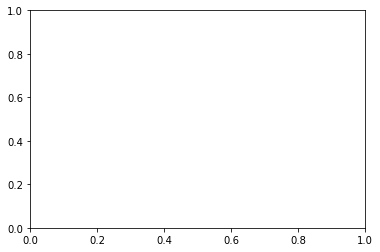

In [202]:
fig, ax = plt.subplots()
Return_Port.hist(bins=50, ax=ax)

<AxesSubplot:title={'center':'Daily Risk Box Plot'}>

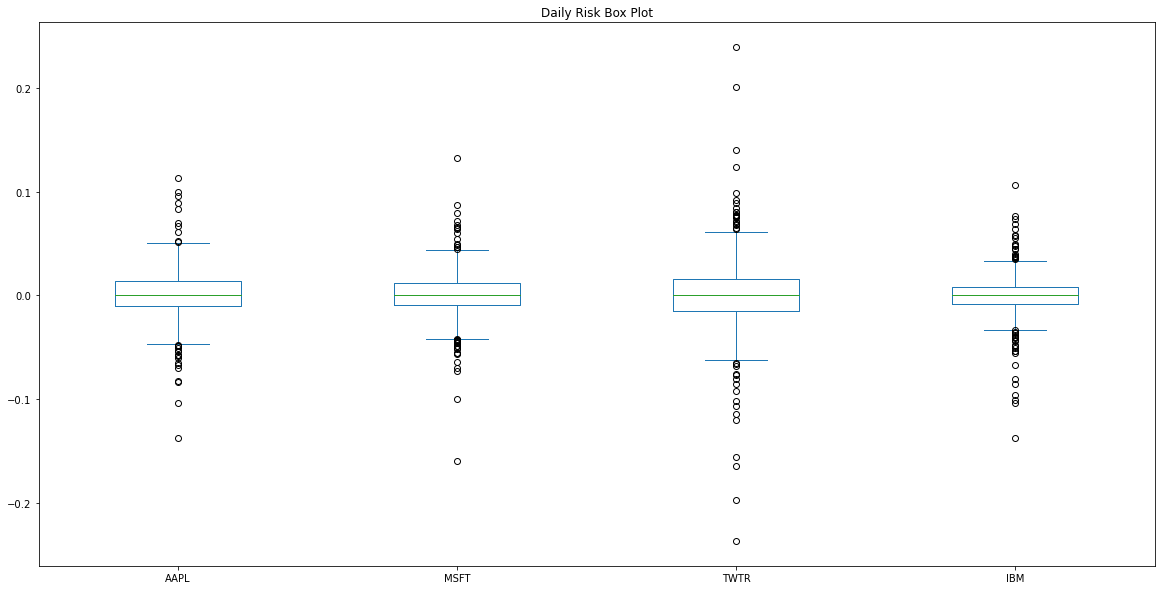

In [199]:
Returns_Portfolio.plot(kind = "box",figsize = (20,10), title = "Daily Risk Box Plot")

In [19]:
# Portfolio Return with weights
w = [0.25,0.15,0.40,0.20] #[0.1, 0.2, 0.5, 0.2]
Return_Port = (w @ mean_returns).sum()
print('The portfolio daily return is ', Return_Port)
print('The portfolio annualized return is ', Return_Port*252)

NameError: name 'mean_returns' is not defined

## Variance & Volatility Matrix

In [149]:
cov_matrix=VCV_Matrix(Returns_Portfolio) #*252
cov_matrix

Symbols,BAC,GS,JPM,MS
Symbols,,,,
BAC,0.000374,0.000281,0.000292,0.000317
GS,0.000281,0.000311,0.000250,0.000303
JPM,0.000292,0.000250,0.000285,0.000277
MS,0.000317,0.000303,0.000277,0.000386


In [117]:
cov_matrix=Returns_Portfolio.cov() #*252
cov_matrix


Symbols,BAC,GS,JPM,MS
Symbols,,,,
BAC,0.000374,0.000281,0.000292,0.000317
GS,0.000281,0.000311,0.000250,0.000303
JPM,0.000292,0.000250,0.000285,0.000277
MS,0.000317,0.000303,0.000277,0.000386


## Correlation Matrix

In [118]:
corr_matrix =Returns_Portfolio.corr(method='pearson')
corr_matrix

Symbols,BAC,GS,JPM,MS
Symbols,,,,
BAC,1.000000,0.824117,0.895471,0.835198
GS,0.824117,1.000000,0.838356,0.873840
JPM,0.895471,0.838356,1.000000,0.836378
MS,0.835198,0.873840,0.836378,1.000000


## Portfolio Variance

In [144]:
# Randomly weighted portfolio's variance

# w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.5, 'AMZN': 0.2}
w = {'BAC': 0.1, 'GS': 0.2, 'JPM': 0.5, 'MS': 0.2}
w = pd.Series(w)

port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
int_var = w @ cov_matrix @ w
print("The portfolio variance is :", port_var)
print('COVAR :',cov_matrix)
print('Test :',type(w))
print(int_var)

The portfolio variance is : 0.0002855616787388103
COVAR : Symbols       BAC        GS       JPM        MS
Symbols                                        
BAC      0.000374  0.000281  0.000292  0.000317
GS       0.000281  0.000311  0.000250  0.000303
JPM      0.000292  0.000250  0.000285  0.000277
MS       0.000317  0.000303  0.000277  0.000386
Test : <class 'pandas.core.series.Series'>
0.0002855616787388103


# Skewness

## Portfolio Expected Returns

In [38]:
# Yearly returns for individual companies
# Filter on index when it's a Date
#df[(df.index.get_level_values('Date') > '2017-12-31')]
ind_er = df.resample('M').last().pct_change().mean()
ind_er

Symbols
BAC    0.011868
GS     0.008879
JPM    0.009128
MS     0.013883
dtype: float64

In [39]:
# Portfolio expected returns with weights
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er

0.010303189375709993

## Plotting the efficient frontier

In [40]:
# Annualised daily volatility
VCV_y=np.sqrt(Return(df,1,'log').cov()*252)
ann_sd=pd.Series(np.diag(VCV_y), index=[VCV_y.index])
ann_sd.index=ind_er.index
ann_sd

Symbols
BAC    0.306768
GS     0.280179
JPM    0.267550
MS     0.311379
dtype: float64

In [41]:
Exp_Returns=pd.DataFrame(ind_er,columns=['Exp Returns'])
Exp_Vol=pd.DataFrame(ann_sd,columns=['Exp Volatility'])

assets = pd.concat([Exp_Returns,Exp_Vol], axis=1)
assets

,Exp Returns,Exp Volatility
Symbols,,
BAC,0.011868,0.306768
GS,0.008879,0.280179
JPM,0.009128,0.267550
MS,0.013883,0.311379


### Start plotting the efficient fronter over 10000 tests

In [42]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000 # Set the number of iterations to 10 000

In [43]:
for portfolio in range(num_portfolios):
    #Select random weights and normalize to set the sum to 1
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_weights.append(weights)
    
    #Calculate the return and standard deviation for every step
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [44]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.tail() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BAC weight,GS weight,JPM weight,MS weight
9995,0.010273,0.267059,0.094301,0.242984,0.463433,0.199282
9996,0.010642,0.270395,0.048942,0.300467,0.344553,0.306038
9997,0.011869,0.282837,0.218393,0.219644,0.099932,0.462030
9998,0.009751,0.264175,0.047505,0.351743,0.478578,0.122175
9999,0.010327,0.272081,0.362343,0.314916,0.262817,0.059923


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

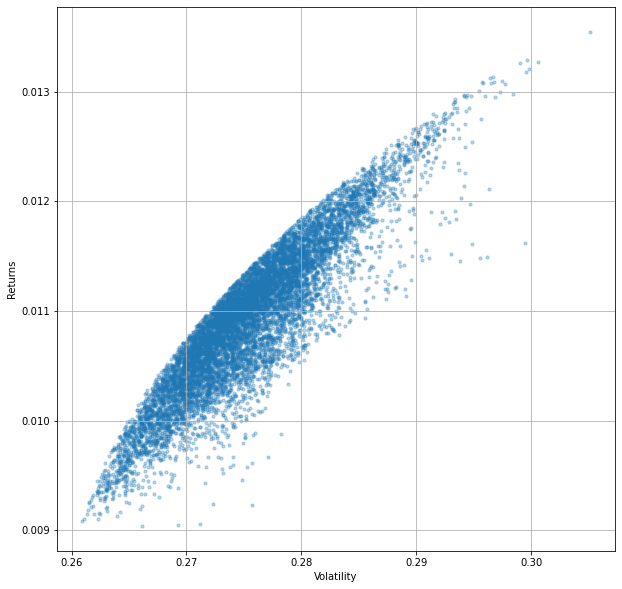

In [45]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [46]:
# Volatility minimisation
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.  
min_vol_port

Returns       0.009081
Volatility    0.260934
BAC weight    0.009933
GS weight     0.335541
JPM weight    0.652611
MS weight     0.001915
Name: 3439, dtype: float64

Text(0, 0.5, 'Returns')

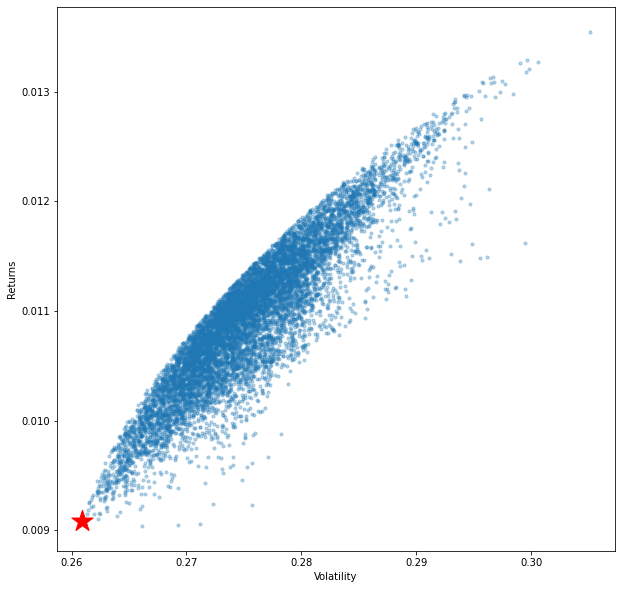

In [47]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

# Optimal Risky Portfolio (maximisation of the sharpe ratio) 



$$Sharpe Ratio=\frac {R_p - R_f}{\sigma_o} $$

$$ \textbf {Where} $$

$$
\begin{cases}
 \bullet {R_p} = \ Return \ of \ Portfolio \\
 \bullet \ {R_f} = \ Risk\ Free \ Rate \\
 \bullet \ {\sigma_o} = Standard \ Deviation \ of \ the \ Portfolio
 \end{cases}       
$$  



In [48]:
# Finding the optimal portfolio
rf = 0.01 # risk free rate
# Maximisation of the Sharpe Ratio
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns       0.013544
Volatility    0.305077
BAC weight    0.028267
GS weight     0.037682
JPM weight    0.019709
MS weight     0.914342
Name: 3844, dtype: float64

Text(0, 0.5, 'Returns')

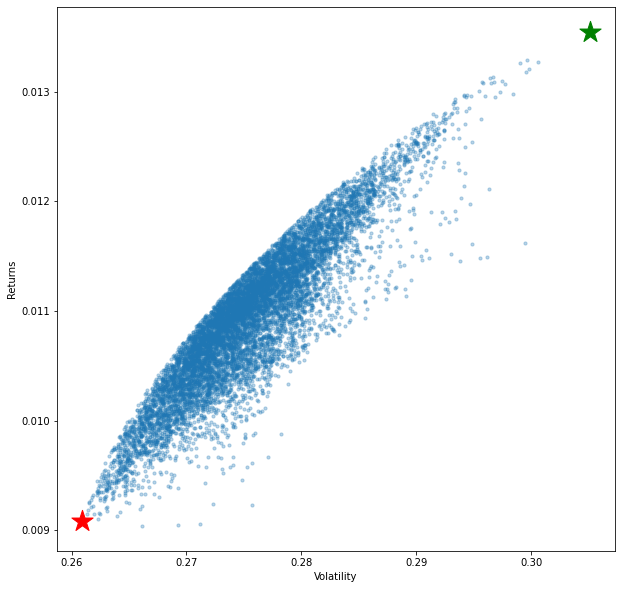

In [49]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
# Simulations spots
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
# Min Vol
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
# Min Sharpe ratio
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)
plt.xlabel('Volatility')
plt.ylabel('Returns')

# Portfolio Optimisation

## 1 Creation of an efficient fronter

In [54]:
portfolios.resample('Y').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [23]:
# Initialisation of empty list for storing the portfolio returns, volatility and weights
port_returns=[]
port_volatility=[]
port_weights=[]

portfolio=price_data

# Assets nb comprise in the portfolio
num_assets=len(portfolio.columns)
num_portfolios= 10000 # nb max of portfolios

# Computing the individual asset return
individual_rets=portfolio.resample('Y').last().pct_change().mean

print(individual_rets)


<bound method DataFrame.mean of Symbols         AAPL      AMZN      MSFT     GOOGL      META
Date                                                        
2013-12-31       NaN       NaN       NaN       NaN       NaN
2014-12-31  0.406225 -0.221771  0.275646 -0.053940  0.427630
2015-12-31 -0.030137  1.177831  0.226919  0.466118  0.341451
2016-12-31  0.124805  0.109456  0.150777  0.018560  0.099274
2017-12-31  0.484643  0.559564  0.407306  0.329295  0.533768
2018-12-31 -0.053902  0.284317  0.207953 -0.008012 -0.257112
2019-12-31  0.889579  0.230277  0.575581  0.281762  0.565718
2020-12-31  0.601848  0.743257  0.357959  0.110879  0.299050>


In [24]:
for port in range(num_portfolios):
    # Weights
    # Randomly generate weights combination
    weights=np.random.random(num_assets)
    # Normalise weights (total sum=1)
    weights=weights/np.sum(weights)
    port_weights.append(weights)
    # Returns
    # Returns= weights * Expected individual returns
    returns=np.dot(weights,individual_rets)
    port_returns.append(returns)
    
    # Computing Portfolio Variance
    var=var_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    # Daily Standard Deviation
    st=np.sqrt(var)
    # Annualisation of the daily standatd deviation
    ann_sd=sd*np.sqrt(252)
    port_volatility.append(ann_sd)

TypeError: unsupported operand type(s) for *: 'float' and 'method'

# Moving average
- https://blog.quantinsti.com/build-technical-indicators-in-python/
- https://dev.to/qviper/python-for-stock-market-analysis-exploring-technical-trend-indicators-a71https://dev.to/qviper/python-for-stock-market-analysis-exploring-technical-trend-indicators-a71


In [6]:
# Linear Moving average
def mov_av(ndays,df,ma_type,nstocks):
    print(len(df.columns))
    if ma_type=='sma': # Simple Moving Average
        df.rolling(window=ndays).mean()
    elif ma_type=='ema': # Exponential Moving Average
        df.ewm(span=ndays, min_periods = ndays - 1, adjust=False).mean()
    elif ma_type=='wma': # Weighted Moving Average
        #df.rolling(window = ndays ).apply(lambda x: np.sum(weights*x)) #
        df.rolling(window=ndays, min_periods=ndays).apply(lambda x: np.average(x, weights=np.arange(1, ndays+1,1)))
    
    for i in df.columns:
        df['%s_%s_%sD' % (i,ma_type,ndays)]=df[i]
        print(len(df.columns))
    
    # Only keep the moverin average elements
    dg=df.iloc[:,nstocks:]
    
    return dg

In [ ]:
mov_av(5,df,'sma',len(symbols))

In [151]:
arr = [1, 2, 3, 7, 9]
  
# Store cumulative sums of array in cum_sum array
cum_sum = np.cumsum(arr);
cum_sum

array([ 1,  3,  6, 13, 22])

In [183]:
Ret_val= Return(price_data,1,'linear')
Ret_val.tail()

linear


Symbols,FB_linReturn,FB_CumlinReturn
Date,,
2022-09-20,-0.013039,-0.723779
2022-09-21,-0.027175,-0.750954
2022-09-22,0.004926,-0.746029
2022-09-23,-0.016874,-0.762903
2022-09-26,-0.017093,-0.779996


In [148]:
Return=logReturn(price_data,1)
Return.head()

Symbols,VOO_logReturn,VEA_logReturn,VB_logReturn,VWO_logReturn,BND_logReturn
Date,,,,,
2013-01-03,-0.000898,-0.010104,-0.000601,-0.005955,-0.002984
2013-01-04,0.004187,0.005626,0.007549,0.001768,0.001553
2013-01-07,-0.002690,-0.005062,-0.002989,-0.008650,-0.000716
2013-01-08,-0.002997,-0.005371,-0.001918,-0.008276,0.000955
2013-01-09,0.002997,0.004807,0.004309,0.005823,-0.000358


# Weights

In [21]:
w = [0.1,0.2,0.25,0.25,0.2]
print(sum(w))

1.0


In [25]:
wts_table = pd.DataFrame({'symbol':symbols,
                          'wts':[0.25,0.25,0.2,0.2,0.1]})
print(wts_table.head())

  symbol   wts
0    VOO  0.25
1    VEA  0.25
2     VB  0.20
3    VWO  0.20
4    BND  0.10


In [23]:
# Weighted returns for each assets
weighted_returns=(Return * w)

# Total return of the portfolio
port_ret = weighted_returns.sum(axis=1)
# axis =1 only add the rows
port_ret

Date
2013-01-03   -0.004347
2013-01-04    0.004184
2013-01-07   -0.004334
2013-01-08   -0.003732
2013-01-09    0.003723
                ...   
2018-02-23    0.011386
2018-02-26    0.006435
2018-02-27   -0.015091
2018-02-28   -0.009193
2018-03-01   -0.004691
Length: 1299, dtype: float64

# Plot Figure

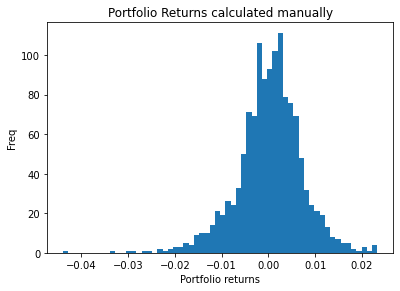

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show(); 

In [ ]:
symbols = ["VEA", "VB", "VWO","BND"] #["AIRF", "BOUY", "AXAF"] #["VOO","VEA", "VB", "VWO","BND"]

for stocks in symbols:
    df = investpy.etfs.get_etf_historical_data(etf='Vanguard FTSE Emerging Markets',
                                               country='united states',
                                               from_date = '01/01/2013',
                                               to_date = '01/03/2022',
                                               as_json=False,
                                               order='ascending')
    price_data=pd.concate([price_data,df])
print(price_data.head())

In [ ]:
investpy.etfs.get_etf_historical_data(etf='US9220428588',
                                      country='united states',
                                      from_date = '01/01/2013',
                                      to_date = '01/03/2022')

In [ ]:
data = investpy.get_etf_historical_data(etf='BBVA Accion DJ Eurostoxx 50', country='spain', from_date='01/01/20000', to_date='01/01/2022')
data.head()

# MAX DRAWDOWN

Source: https://www.cfainstitute.org/-/media/documents/code/gips/gips-standards-for-fmp-handbook-s32.pdf

In [86]:
def MDD(df,windows) : # MAX Drawdown Daily=252, monthly=22, weekly=5
    freq_={
        "Daily": 252 ,
        "Monthly": 22,
        "Weekly": 5,
        "Annualy": 12
    }
    
    Roll_max=df.rolling(freq_[windows], min_periods=1).max()
    Monthly_DD=df/Roll_max-1.0
    Max_Monthly_DD=Monthly_DD.rolling(freq_[windows], min_periods=1).min()

    print('MDD :', Max_Monthly_DD.min()[0]*100)
    return

In [90]:
df=pd.DataFrame([100,103.428,103.666,102.143,105.756,103.410,102.821,104.609,104.421,104.692,105.048,103.32,97.997],
                index=[1,2,3,4,5,6,7,8,9,10,11,12,13],
                columns=['Close'])


MDD_=MDD(df,'Annualy')
print(MDD_)
                


MDD : -7.33669957260108
None


In [88]:
import os

# Find out your current working directory
print(os.getcwd())
# Display all of the files found in your current working directory
print(os.listdir(os.getcwd())) # print(os.listdir('/home/frederic/Downloads'))

print(os.scandir(r'/home/frederic/Documents/Python/SDG/'))


# Change Directory ('../' Move up the current directory
#os.chdir('../')
os.chdir('/home/frederic/Documents/Python/SDG/')
#print(os.getcwd())
path=r'/home/frederic/Documents/Python/SDG/'
print('Existance :', os.path.exists(path))


def tree_printer(root):
    for root, dirs, files in os.walk(root):
        print('DIR :',dirs)
        print('Files :',files)
        for d in dirs:
            print('Folder :',d,'Full path :', os.path.join(root, d))    
        for f in files:
            print('File :',f, 'Path :', os.path.join(root, f))
print('TREE')
tree_printer(os.getcwd()) #'.')


/home/frederic/Documents/Python/SDG
['MARKDOWN.ipynb', 'Test1.ipynb', 'List_20220530.zip', 'PDF_Extract.ipynb', '.ipynb_checkpoints', 'Data_Test', 'Risks_Indicators.ipynb', 'black_litterman.ipynb', 'Doc']
Existance : True
TREE
DIR : ['.ipynb_checkpoints', 'Data_Test', 'Doc']
Files : ['MARKDOWN.ipynb', 'Test1.ipynb', 'List_20220530.zip', 'PDF_Extract.ipynb', 'Risks_Indicators.ipynb', 'black_litterman.ipynb']
Folder : .ipynb_checkpoints Full path : /home/frederic/Documents/Python/SDG/.ipynb_checkpoints
Folder : Data_Test Full path : /home/frederic/Documents/Python/SDG/Data_Test
Folder : Doc Full path : /home/frederic/Documents/Python/SDG/Doc
File : MARKDOWN.ipynb Path : /home/frederic/Documents/Python/SDG/MARKDOWN.ipynb
File : Test1.ipynb Path : /home/frederic/Documents/Python/SDG/Test1.ipynb
File : List_20220530.zip Path : /home/frederic/Documents/Python/SDG/List_20220530.zip
File : PDF_Extract.ipynb Path : /home/frederic/Documents/Python/SDG/PDF_Extract.ipynb
File : Risks_Indicators.ip

In [174]:

# Absolute path
df=pd.read_csv(r'/home/frederic/Documents/Python/SDG/Data_Test/MSCI World - Données Historiques.csv', index_col=0) #, header = True) #, names=['Close','Open','High','Low','Vol.','Variation %'])
#df['Close'] = df['Close'].astype(float)
#df.columns=df.rename(['Close','Open','High','Low','Vol.','Variation %'])
print(df.columns)

#MDD(df,'Daily')
# Relative path



Index(['Dernier', 'Ouv.', ' Plus Haut', 'Plus Bas', 'Vol.', 'Variation %'], dtype='object')


In [3]:
import investpy

df = investpy.get_stock_historical_data(stock='AAPL',
                                        country='United States',
                                        from_date='01/01/2017',
                                        to_date='31/12/2021')
print(df.head())

ConnectionError: ERR#0015: error 403, try again later.

In [4]:


import investpy
import pandas as pd

import random

from pprint import pprint



In [5]:
#Data Source
#https://pypi.org/project/yfinance/
import yfinance as yf

In [8]:
dt.date(Now)

NameError: name 'Now' is not defined

In [30]:
#msft = yf.Tickers("msft aapl goog")


enddate = dt.datetime.strptime("2022-10-6", "%Y-%m-%d").date()
startdate = enddate - dt.timedelta(days=365*1)
print('Start Date :',startdate)
#startdate = dt.datetime.strptime("2017-01-01", "%Y-%m-%d").date()


# get historical market data
#hist = msft.history(period="max")

data = yf.download(tickers="WLDC.MI", start=startdate, end=enddate, interval="1d")
data=data.sort_index(axis = 0, ascending = True)
print(data)
Init_Val=data.iloc[0, data.columns.get_loc('Adj Close')]

data['Value']=data['Adj Close']/Init_Val*100

#data_adj[(data_adj.index>'2017-01-04') & (data_adj.index<'2017-01-14')])
data_adj=data[['Adj Close','Value']]
#print(data_adj['Value'].plot())
print('MDD :', MDD(data_adj['Adj Close'],'Daily')[0])
print(data_adj['Value'])
print('Vol :',Return(data_adj['Adj Close'],1,'linear'))
print(data_adj['Adj Close'])

Start Date : 2021-10-06
[*********************100%***********************]  1 of 1 completed
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2021-10-06  10.774  10.774  10.774  10.774     10.774       0
2021-10-07  10.774  10.774  10.774  10.774     10.774       0
2021-10-08  10.774  10.774  10.774  10.774     10.774       0
2021-10-11  10.774  10.774  10.774  10.774     10.774       0
2021-10-12  10.774  10.774  10.774  10.774     10.774       0
...            ...     ...     ...     ...        ...     ...
2022-09-29  10.488  10.488  10.280  10.280     10.280    3896
2022-09-30  10.350  10.350  10.350  10.350     10.350    1246
2022-10-03  10.116  10.332  10.116  10.328     10.328    6291
2022-10-04  10.444  10.504  10.444  10.504     10.504   12572
2022-10-05  10.488  10.488  10.488  10.488     10.488    2069

[256 rows x 6 columns]
MDD : -0.16565348834325577
Date
2021-10-06    100.000000
2021-10-07    100.00

In [210]:
data.columns.get_loc('Adj Close')

4